## Import the libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

import os

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score


In [ ]:
train_df = pd.read_csv('/content/bean_train.csv')
test_df = pd.read_csv('/content/bean_test.csv')

print("The shape of the train dataset is {}.\n\n".format(train_df.shape))
print("The shape of the test dataset is {}.\n\n".format(test_df.shape))

The shape of the train dataset is (10834, 18).


The shape of the test dataset is (2709, 17).




In [ ]:
train_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,SEKER
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,DERMASON
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,CALI
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,SIRA


In [ ]:
test_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,13538,66833,1018.336,400.397077,214.346215,1.867992,0.844640,67787,291.709476,0.759604,0.985927,0.809876,0.728550,0.005991,0.001041,0.530786,0.991504
2705,13539,40572,725.331,250.714014,206.471935,1.214276,0.567264,40900,227.283688,0.767479,0.991980,0.969089,0.906546,0.006179,0.002574,0.821825,0.997923
2706,13540,61226,1008.378,408.227467,199.385082,2.047432,0.872611,63901,279.204879,0.611648,0.958138,0.756657,0.683944,0.006668,0.000900,0.467780,0.957748
2707,13541,34238,698.847,255.829224,170.867099,1.497241,0.744255,34724,208.789788,0.724890,0.986004,0.880956,0.816130,0.007472,0.002045,0.666067,0.997263


In [ ]:
submit_df=pd.read_csv('/content/bean_sample_submission.csv')
submit_df

,ID,y
0,10834,HOROZ
1,10835,HOROZ
2,10836,HOROZ
3,10837,HOROZ
4,10838,HOROZ
...,...,...
2704,13538,HOROZ
2705,13539,HOROZ
2706,13540,HOROZ
2707,13541,HOROZ


In [ ]:
train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


## Exploratory Data Analysis

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10834.0,5416.500000,3127.650742,0.000000,2708.250000,5416.500000,8124.750000,10833.000000
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195


In [ ]:
colors = ['#550000', '#BB0000', '#FF0000', '#EEEE00', '#00FF00', '#00BB00', '#005500']
display(train_df["y"].value_counts(),
px.histogram(data_frame=train_df,template='plotly_dark',x="y",color="y",color_discrete_sequence= colors));

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['y'] = le.fit_transform(train_df.y)

In [ ]:
pd.value_counts(train_df['y'].values.ravel())

3    2837
6    2109
5    1621
4    1488
2    1304
0    1057
1     418
dtype: int64

In [ ]:
train_df['y']=train_df['y'].astype('category')
print(train_df['y'])
#train_df=train_df.loc[train_df['y']=='1','BARBUNYA']


0        4
1        5
2        3
3        3
4        6
        ..
10829    5
10830    3
10831    2
10832    6
10833    3
Name: y, Length: 10834, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]


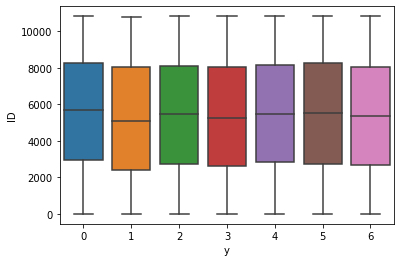

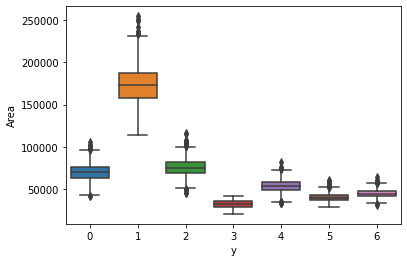

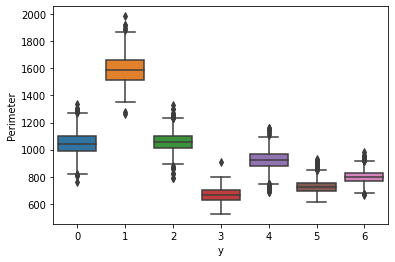

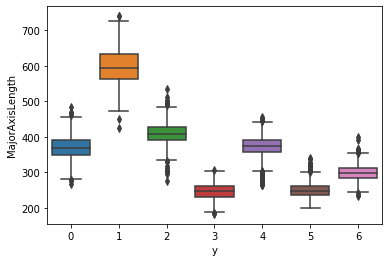

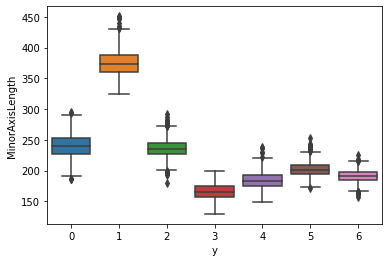

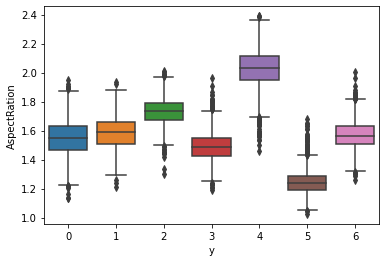

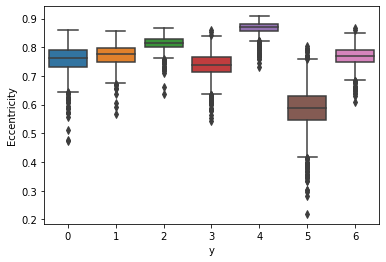

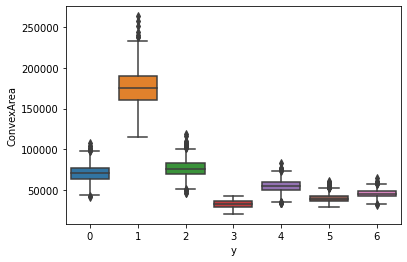

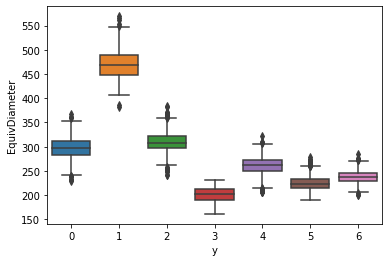

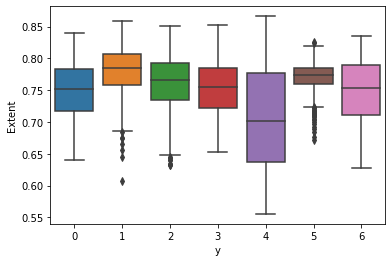

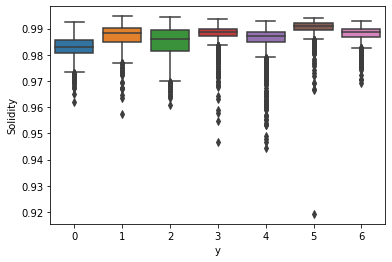

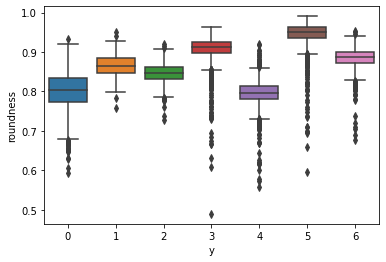

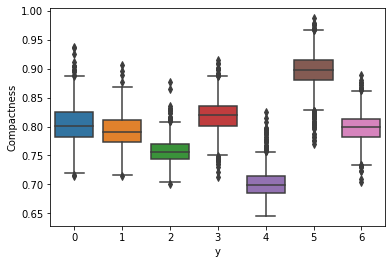

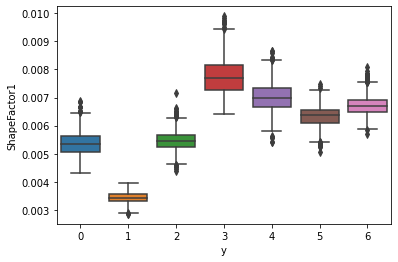

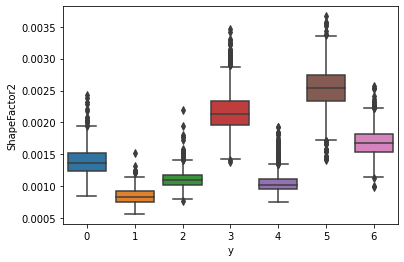

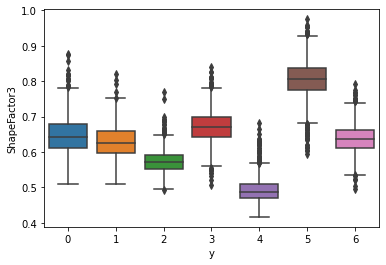

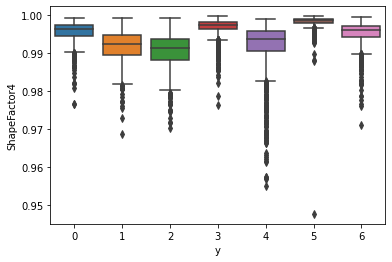

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = train_df.columns
for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='y', y=feature_names[i], data=train_df)

In [ ]:
df = train_df.copy(deep=True) # Make a copy of original data, just in case

# Create new dataframe for each type

types = df['y'].unique()
d = {type: df[df['y'] == type] for type in types}

In [ ]:
d[1]

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
18,18,162230,1486.167,543.407255,381.837178,1.423139,0.711514,163470,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492,1
21,21,203688,1738.084,676.058986,389.116090,1.737422,0.817756,207028,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852,1
38,38,139639,1379.183,473.780598,376.550241,1.258214,0.606901,140541,421.656136,0.783916,0.993582,0.922514,0.889982,0.003393,0.001313,0.792068,0.996590,1
47,47,152063,1455.551,524.784869,371.247487,1.413572,0.706785,153860,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777,1
89,89,197245,1702.646,642.077245,396.085390,1.621058,0.787056,200777,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,10596,175144,1584.943,601.674950,372.972648,1.613188,0.784688,176889,472.229041,0.821994,0.990135,0.876149,0.784857,0.003435,0.000804,0.616001,0.993726,1
10628,10628,182940,1636.335,624.297759,376.421904,1.658505,0.797777,185434,482.624536,0.792689,0.986550,0.858567,0.773068,0.003413,0.000752,0.597634,0.991179,1
10726,10726,145163,1449.277,535.862446,346.383944,1.547019,0.762995,146814,429.915424,0.704613,0.988754,0.868486,0.802287,0.003691,0.000943,0.643664,0.995761,1
10789,10789,161579,1502.815,558.604121,368.791025,1.514690,0.751089,162975,453.573337,0.801960,0.991434,0.899050,0.811976,0.003457,0.000927,0.659306,0.998644,1


In [ ]:
# Set the quantile

low = .25
high = .75

bounds = {}
for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'y'] # Remove 'Type' Column
    quant_df = filt_df.quantile([low, high])
    IQR = quant_df.iloc[1,:]-  quant_df.iloc[0,:]
    quant_df.iloc[0,:] = quant_df.iloc[0,:] - 1.5*IQR
    quant_df.iloc[1,:] = quant_df.iloc[1,:] + 1.5*IQR
    bounds[type] = quant_df
    
bounds[1]

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0.25,-5990.25,113397.0,1287.37825,457.186766,316.209152,1.280645,0.673591,115097.5,387.922665,0.684395,0.976980,0.791032,0.714255,0.002883,0.000472,0.504430,0.981655
0.75,16439.75,232171.0,1883.22225,736.412433,432.158061,1.881707,0.871321,234921.5,549.282946,0.879356,0.998254,0.939964,0.870606,0.003998,0.001196,0.752225,1.002831


In [ ]:
# Define our new dataset by removing the outliers 

filt_df = d[1].loc[:, d[1].columns != 'y'] # Remove 'Type' Column
filt_df = filt_df.apply(lambda x: x[(x>bounds[1].loc[low,x.name]) & (x < bounds[1].loc[high,x.name])], axis=0)
filt_df = pd.concat([filt_df,d[1].loc[:,'y']], axis=1)

filt_df

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
18,18,162230.0,1486.167,543.407255,381.837178,1.423139,0.711514,163470.0,454.486140,0.782835,0.992415,0.923009,0.836364,0.003350,0.001011,0.699504,0.995492,1
21,21,203688.0,1738.084,676.058986,389.116090,1.737422,0.817756,207028.0,509.257908,0.788071,0.983867,0.847293,0.753274,0.003319,0.000659,0.567422,0.985852,1
38,38,139639.0,1379.183,473.780598,376.550241,NaN,NaN,140541.0,421.656136,0.783916,0.993582,0.922514,NaN,0.003393,NaN,NaN,0.996590,1
47,47,152063.0,1455.551,524.784869,371.247487,1.413572,0.706785,153860.0,440.014346,0.764451,0.988321,0.901942,0.838466,0.003451,0.001052,0.703025,0.993777,1
89,89,197245.0,1702.646,642.077245,396.085390,1.621058,0.787056,200777.0,501.138837,0.802083,0.982408,0.855002,0.780496,0.003255,0.000745,0.609174,0.987507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10596,10596,175144.0,1584.943,601.674950,372.972648,1.613188,0.784688,176889.0,472.229041,0.821994,0.990135,0.876149,0.784857,0.003435,0.000804,0.616001,0.993726,1
10628,10628,182940.0,1636.335,624.297759,376.421904,1.658505,0.797777,185434.0,482.624536,0.792689,0.986550,0.858567,0.773068,0.003413,0.000752,0.597634,0.991179,1
10726,10726,145163.0,1449.277,535.862446,346.383944,1.547019,0.762995,146814.0,429.915424,0.704613,0.988754,0.868486,0.802287,0.003691,0.000943,0.643664,0.995761,1
10789,10789,161579.0,1502.815,558.604121,368.791025,1.514690,0.751089,162975.0,453.573337,0.801960,0.991434,0.899050,0.811976,0.003457,0.000927,0.659306,0.998644,1


In [ ]:
# Let's remove the outliers from the dataset 
df_new = {}

for type in types:
    filt_df = d[type].loc[:, d[type].columns != 'y'] # Remove 'Type' Column
    filt_df = filt_df.apply(lambda x: x[(x>bounds[type].loc[low,x.name]) & (x < bounds[type].loc[high,x.name])], axis=0)
    df_new[type] = pd.concat([filt_df,d[type].loc[:,'y']], axis=1)


glassdata_new = result = pd.concat(df_new)
glassdata_new

ID      Area  Perimeter  ...  ShapeFactor3  ShapeFactor4  y
4 0          0   58238.0    971.303  ...      0.469994      0.998595  4
  6          6   45817.0    862.123  ...      0.524629      0.994495  4
  15        15   63899.0    984.916  ...      0.512109      0.993809  4
  22        22   72012.0   1046.449  ...           NaN      0.990702  4
  24        24   55308.0    964.005  ...      0.477099      0.994398  4
...        ...       ...        ...  ...           ...           ... ..
1 10596  10596  175144.0   1584.943  ...      0.616001      0.993726  1
  10628  10628  182940.0   1636.335  ...      0.597634      0.991179  1
  10726  10726  145163.0   1449.277  ...      0.643664      0.995761  1
  10789  10789  161579.0   1502.815  ...      0.659306      0.998644  1
  10790  10790  167321.0   1578.125  ...      0.615551      0.983588  1

[10834 rows x 18 columns]

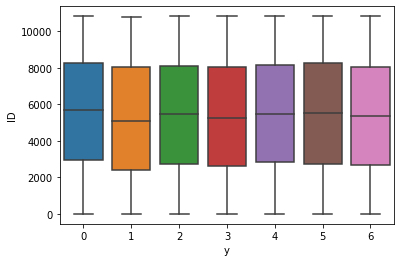

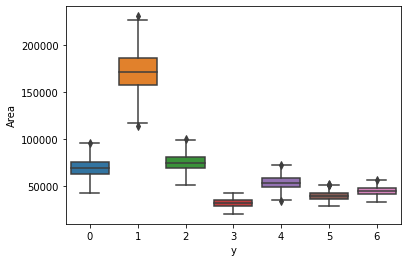

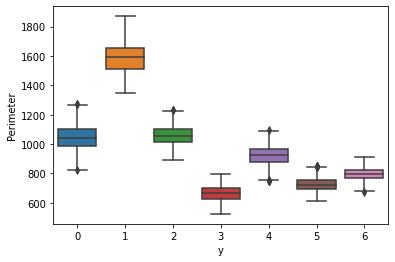

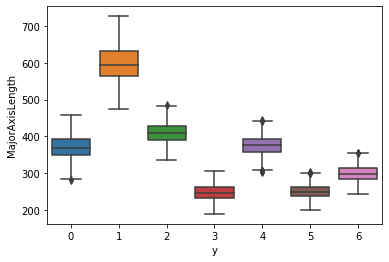

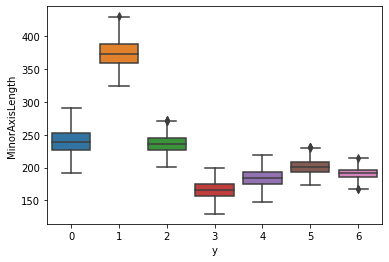

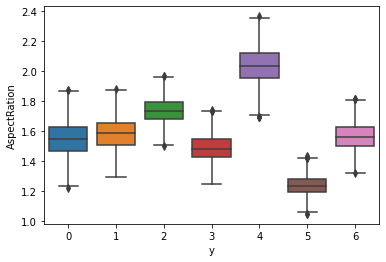

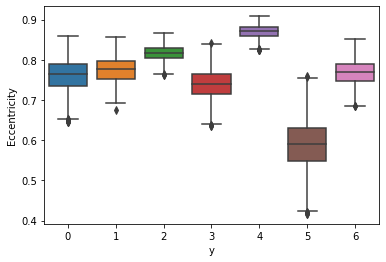

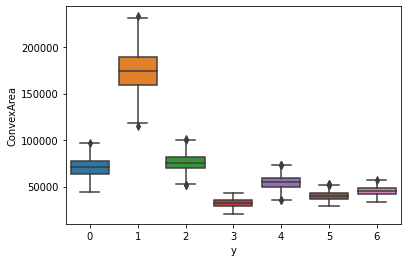

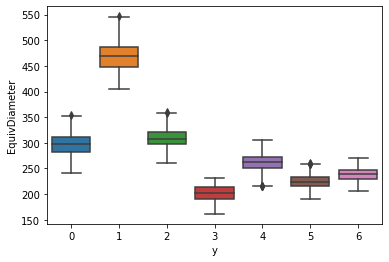

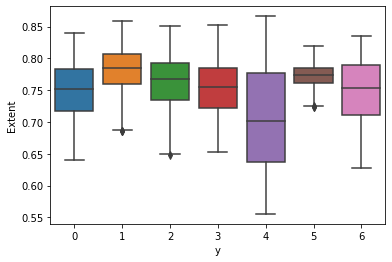

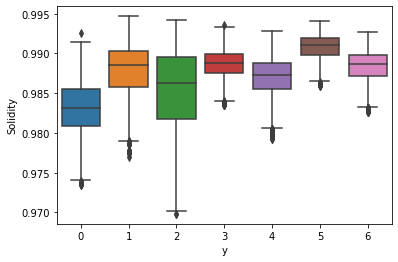

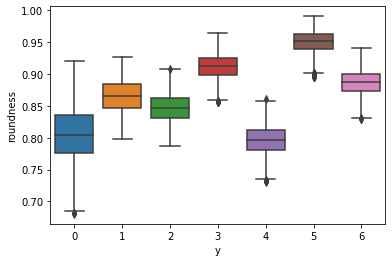

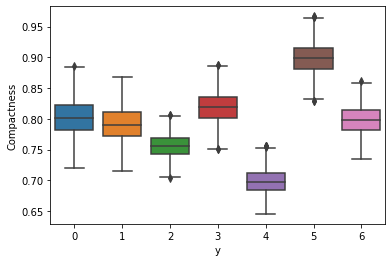

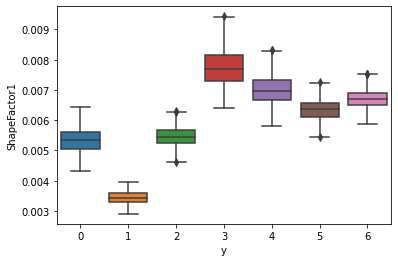

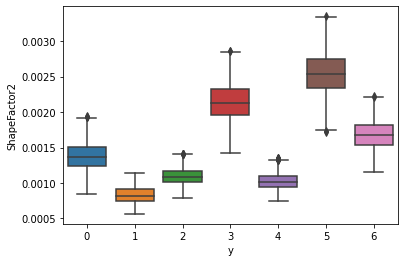

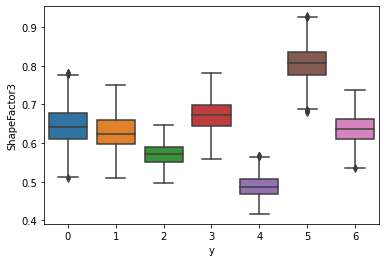

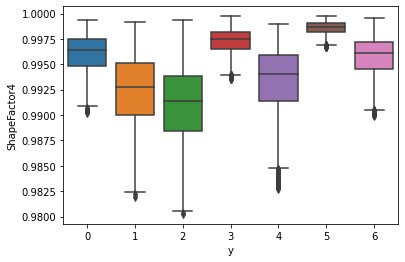

In [ ]:
# Now we have our glass data that has all outliers removed
# Check out the boxplot again

for i in range(len(feature_names)-1):
    figure = plt.figure()
    ax = sns.boxplot(x='y', y=feature_names[i], data=glassdata_new)

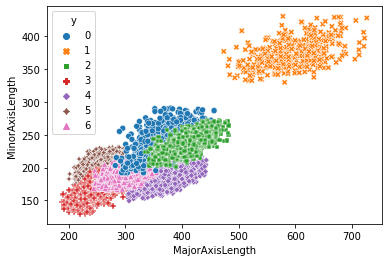

In [ ]:
sns.scatterplot(x="MajorAxisLength",y="MinorAxisLength",data=glassdata_new,hue='y',style="y")
plt.show()

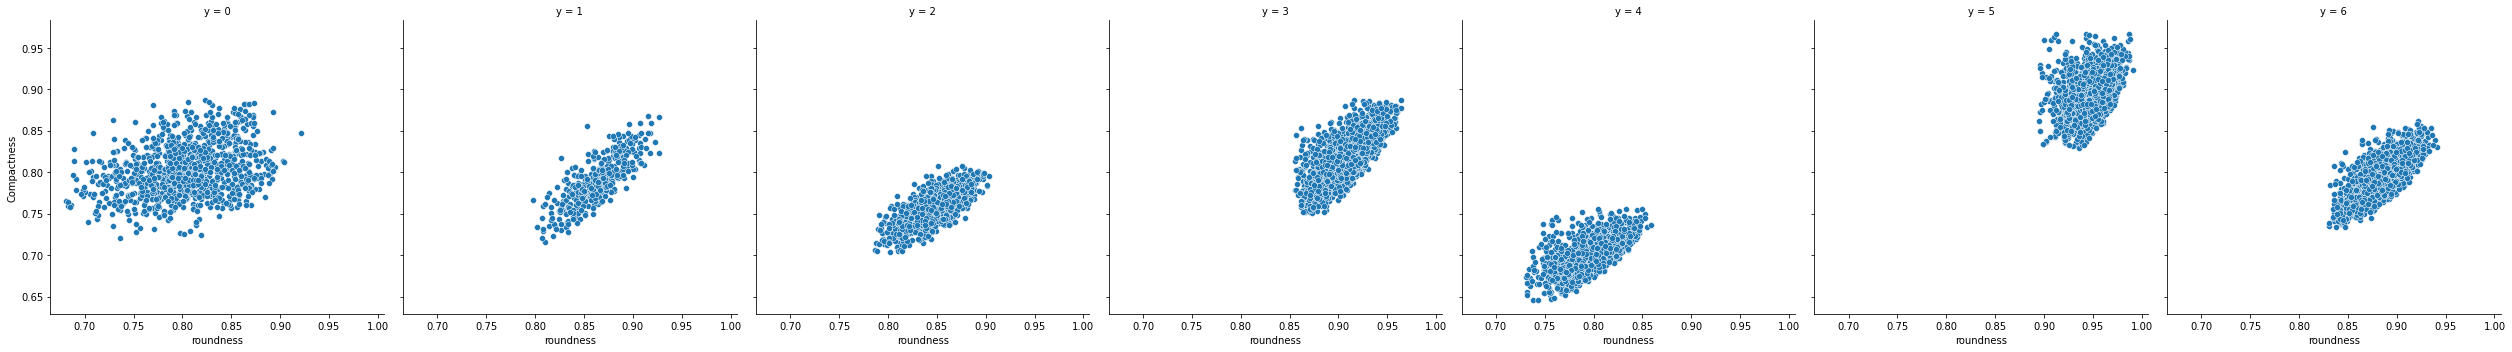

In [ ]:
sns.relplot(x="roundness",y="Compactness",data=glassdata_new,kind="scatter",col="y")
plt.show()

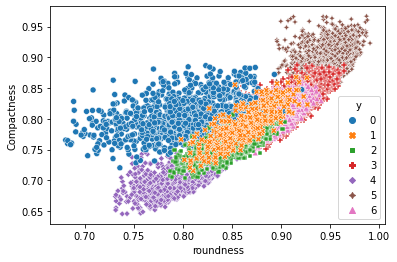

In [ ]:
sns.scatterplot(x="roundness",y="Compactness",data=glassdata_new,hue='y',style="y")
plt.show()

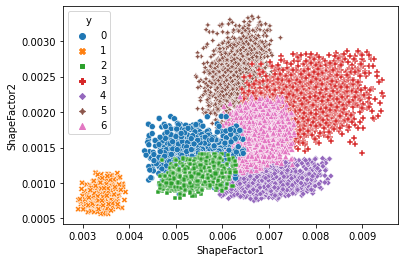

In [ ]:
sns.scatterplot(x="ShapeFactor1",y="ShapeFactor2",data=glassdata_new,hue='y',style="y")
plt.show()

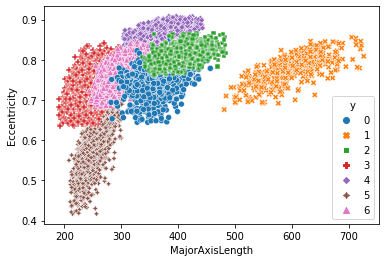

In [ ]:
sns.scatterplot(x="MajorAxisLength",y="Eccentricity",data=glassdata_new,hue='y',style="y")
plt.show()

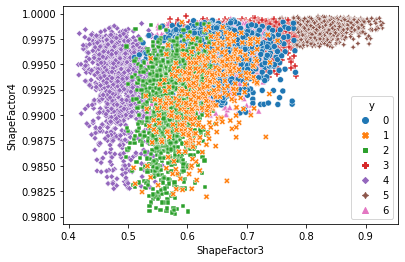

In [ ]:
sns.scatterplot(x="ShapeFactor3",y="ShapeFactor4",data=glassdata_new,hue='y',style="y")
plt.show()

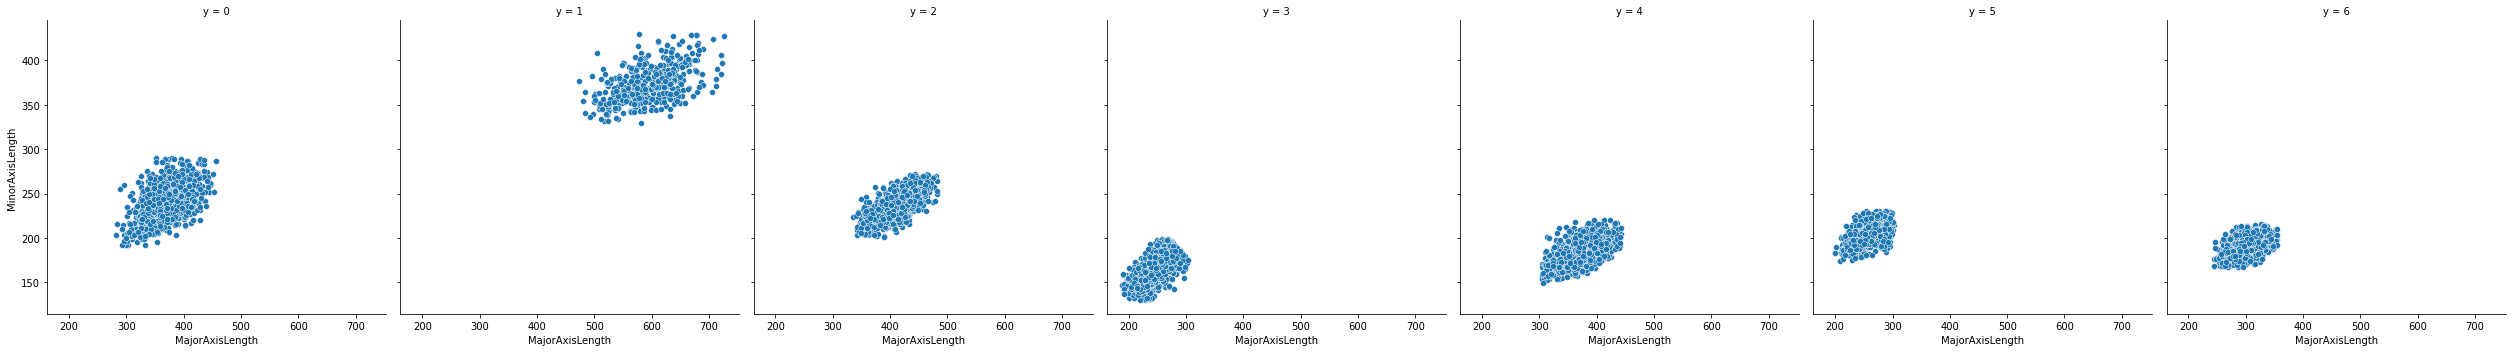

In [ ]:
sns.relplot(x="MajorAxisLength",y="MinorAxisLength",data=glassdata_new,kind="scatter",col="y")
plt.show()

In [ ]:

# train_df['calculated area'] = 0.5*train_df['MajorAxisLength']*0.5*train_df['MinorAxisLength']*3.14
# train_df['calculated perimeter'] = 2*3.14*np.sqrt(((train_df['MajorAxisLength']*0.5)**2 + (train_df['MinorAxisLength']*0.5)**2)//2)
# train_df['calculated volume'] = ((4*3.14)//3)*0.5*train_df['MajorAxisLength']*0.5*train_df['MinorAxisLength']*0.5*train_df['EquivDiameter']
# test_df['calculated area'] = 0.5*test_df['MajorAxisLength']*0.5*test_df['MinorAxisLength']*3.14
# test_df['calculated perimeter'] = 2*3.14*np.sqrt(((test_df['MajorAxisLength']*0.5)**2 + (test_df['MinorAxisLength']*0.5)**2)//2)
# test_df['calculated volume'] = ((4*3.14)//3)*0.5*test_df['MajorAxisLength']*0.5*test_df['MinorAxisLength']*0.5*test_df['EquivDiameter']

In [ ]:

#glassdata_new['focal distance'] = 0.5*glassdata_new['MajorAxisLength']*glassdata_new['Eccentricity']

#train_df['Semi-latus rectum'] = ((train_df['MinorAxisLength']*0.5)**2)/(0.5*train_df['MajorAxisLength'])

#train_df['radius at apoapsis'] = (1+train_df['Eccentricity'])*(0.5*train_df['MajorAxisLength'])

#train_df['radius at periapsis'] = (1-train_df['Eccentricity'])*(0.5*train_df['MajorAxisLength'])

#train_df['convex perimeter'] = train_df['Perimeter']*train_df['Solidity']

In [ ]:
#train_df['Semi-latus rectum']

In [ ]:

# fig1 = px.box(data_frame=train_df,template='plotly_dark',x="y",y=["EquivDiameter"],color="y",width=700,height=350,title="EquivDiameter")
# fig2 = px.box(data_frame=train_df,template='plotly_dark',
#        x="y",y=["ConvexArea"],color="y",width=700,height=350,title="ConvexArea")
# fig1.show()
# fig2.show()

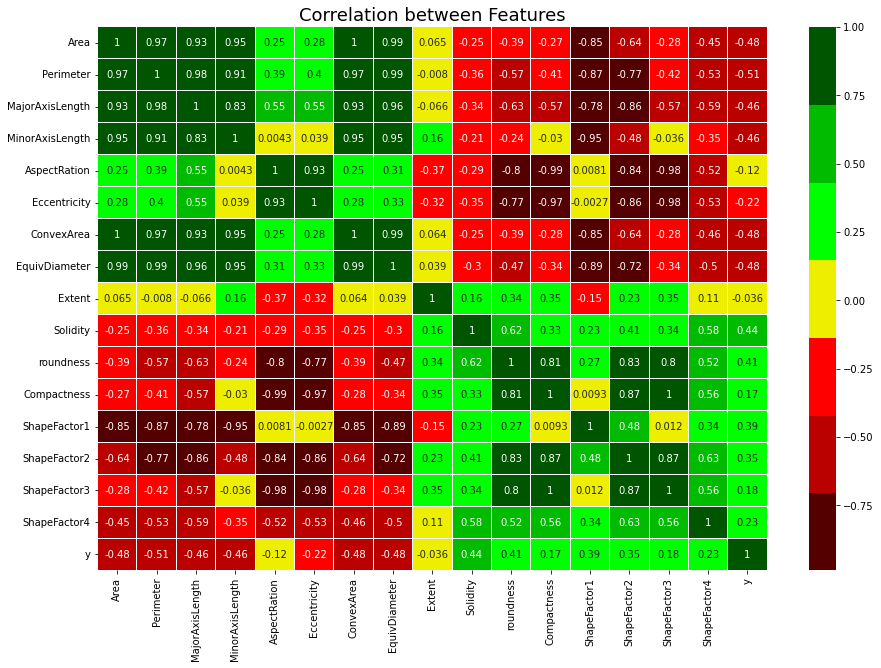

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr = glassdata_new.copy()
corr['y'] = le.fit_transform(corr.y)

corr_martix = corr.drop('ID',axis=1).corr()
plt.subplots(figsize=(15,10))
plt.title('Correlation between Features', size=18)
sns.heatmap(corr_martix,linewidths=0.01,cmap=colors , annot=True)
plt.show()

In [ ]:
glassdata_new

ID      Area  Perimeter  ...  ShapeFactor3  ShapeFactor4  y
4 0          0   58238.0    971.303  ...      0.469994      0.998595  4
  6          6   45817.0    862.123  ...      0.524629      0.994495  4
  15        15   63899.0    984.916  ...      0.512109      0.993809  4
  22        22   72012.0   1046.449  ...           NaN      0.990702  4
  24        24   55308.0    964.005  ...      0.477099      0.994398  4
...        ...       ...        ...  ...           ...           ... ..
1 10596  10596  175144.0   1584.943  ...      0.616001      0.993726  1
  10628  10628  182940.0   1636.335  ...      0.597634      0.991179  1
  10726  10726  145163.0   1449.277  ...      0.643664      0.995761  1
  10789  10789  161579.0   1502.815  ...      0.659306      0.998644  1
  10790  10790  167321.0   1578.125  ...      0.615551      0.983588  1

[10834 rows x 18 columns]

In [ ]:
glassdata_new.isnull().sum()

ID                   0
Area               102
Perimeter          130
MajorAxisLength    122
MinorAxisLength     88
AspectRation       183
Eccentricity       232
ConvexArea         103
EquivDiameter       97
Extent              41
Solidity           500
roundness          326
Compactness        184
ShapeFactor1       113
ShapeFactor2       203
ShapeFactor3       188
ShapeFactor4       498
y                    0
dtype: int64

In [ ]:
print(train_df.shape)
print(glassdata_new.shape)

(10834, 18)
(10834, 18)


In [ ]:


cols = glassdata_new.columns.drop('ID').drop('y')


for col in cols:
  
  glassdata_new[col] = glassdata_new[col].fillna(glassdata_new.groupby('y')[col].transform('mean'))

  

In [ ]:
#glassdata_new=glassdata_new.replace(np.nan, 0)
glassdata_new.head(20)

ID     Area  Perimeter  ...  ShapeFactor3  ShapeFactor4  y
4 0      0  58238.0    971.303  ...      0.469994      0.998595  4
  6      6  45817.0    862.123  ...      0.524629      0.994495  4
  15    15  63899.0    984.916  ...      0.512109      0.993809  4
  22    22  72012.0   1046.449  ...      0.488760      0.990702  4
  24    24  55308.0    964.005  ...      0.477099      0.994398  4
  42    42  59411.0    961.532  ...      0.517663      0.993340  4
  46    46  67884.0   1089.592  ...      0.481328      0.989867  4
  53    53  49482.0    873.311  ...      0.494308      0.993575  4
  60    60  52942.0    918.137  ...      0.504695      0.993340  4
  66    66  46563.0    852.780  ...      0.477361      0.995788  4
  72    72  65376.0   1042.788  ...      0.429507      0.993329  4
  95    95  51550.0    913.589  ...      0.452861      0.992678  4
  105  105  50908.0    876.799  ...      0.516315      0.994781  4
  109  109  50107.0    912.961  ...      0.425297      0.996596  4
  111  111  49613.0    870.384  ...      0.488760      0.993340  4
  118  118  46261.0    848.807  ...      0.479559      0.994226  4
  149  149  57822.0    960.638  ...      0.464256      0.995151  4
  156  156  50278.0    882.900  ...      0.488619      0.990121  4
  158  158  47905.0    865.459  ...      0.513627      0.994664  4
  165  165  39441.0    762.355  ...      0.562331      0.993417  4

[20 rows x 18 columns]

In [ ]:
glassdata_new.isnull().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [ ]:
glassdata_new.y.dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

## Data preprocessing and Splitting 

**Standardization**

In [ ]:
# normalize the data
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
standard_df = np.copy(glassdata_new.drop(columns=['ID', 'y','MajorAxisLength','MinorAxisLength']))
standard_df
stand.fit(standard_df)
standard_df = stand.transform(standard_df)

**splitting**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(standard_df,glassdata_new["y"], random_state=42,stratify=glassdata_new["y"])
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

(8125, 14) (2709, 14) (8125,) (2709,)


In [ ]:
train_df.y.unique()

[4, 5, 3, 6, 0, 2, 1]
Categories (7, int64): [4, 5, 3, 6, 0, 2, 1]

In [ ]:
groups=train_df.Solidity
x=standard_df
y=train_df.y
print(x.shape)
print(y.shape)
print(len(groups))

(10834, 14)
(10834,)
10834


In [ ]:

# from sklearn.model_selection import StratifiedKFold
# folds=StratifiedKFold(n_splits=7,random_state=1)
    
# for train_indices,val_indices in folds.split(x,y):
#      X_train, X_test = x[train_indices], x[val_indices]
#      y_train, y_test = y[train_indices], y[val_indices]

        
   

In [ ]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=2)    
# for train_indices,val_indices in kf.split(x,y):
#      X_train, X_test = x[train_indices], x[val_indices]
#      y_train, y_test = y[train_indices], y[val_indices]

In [ ]:
# from sklearn.model_selection import GroupKFold

# group_kfold = GroupKFold(n_splits=7)
# for train_index, test_index in group_kfold.split(x, y, groups):
#     X_train, X_test = x[train_indices], x[val_indices]
#     y_train, y_test = y[train_indices], y[val_indices]


In [ ]:
# from sklearn.model_selection import GroupShuffleSplit
# gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
# for train_index, test_index in gss.split(x, y, groups):
#     X_train, X_test = x[train_indices], x[val_indices]
#     y_train, y_test = y[train_indices], y[val_indices]

In [ ]:
# from sklearn.model_selection import GroupShuffleSplit
# train_indx, test_indx = next(GroupShuffleSplit(random_state=10).split(x, y, groups))
# X_train, X_test = x[train_indx], x[test_indx]
# y_train, y_test = y[train_indx], y[test_indx]

# Lazy predictor

In [ ]:
# ### importing lazypredict library
# import lazypredict
# ### importing LazyClassifier for classification problem
# from lazypredict.Supervised import LazyClassifier

In [ ]:
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
# ### fitting data in LazyClassifier
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# ### lets check which model did better on Breast Cancer Dataset
# print(models)

## Model Training

**1- MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier



# Create an instance of the classifier
mlp = MLPClassifier(learning_rate='adaptive',max_iter=200,random_state=0,alpha=0.0001,learning_rate_init=0.001)

# Train the classifier
mlp.fit(X_train, y_train)
prediction_mlp = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
f1_score(prediction_mlp, y_test,average="micro") #0.94725786244039 #0.9350313768918419 #0.9339239571797712 #0.9354005167958658 #0.9523809523809523

0.9516426725729051

In [ ]:
# emp = np.array([])
# for i in np.arange(50,100,1):
    
#     mlp = MLPClassifier(learning_rate='adaptive',max_iter=i,random_state=0,alpha=0.0001,learning_rate_init=0.001)
#     mlp.fit(X_train, y_train)
#     prediction_mlp = mlp.predict(X_test)
    
#     print("iter num :",i," f1 = ",f1_score(prediction_mlp, y_test,average="micro"))
#     num = f1_score(prediction_mlp, y_test,average=None).mean()
#     emp = np.append(emp,num)
# np.where(emp == max(emp))

**2- SVM**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto')
svm_clf.fit(X = X_train,y= y_train)
prediction_svc = svm_clf.predict(X_test)

In [ ]:
f1_score(prediction_svc, y_test,average="micro")
#0.9368770764119602 #0.9365079365079365 #0.9368770764119602 #0.9372462163159837 #0.955703211517165

0.955703211517165

**3- XGB**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X = X_train,y= y_train)
prediction_xgb = xgb.predict(X_test)

In [ ]:
f1_score(prediction_xgb, y_test,average="micro")
#0.9309708379475822 #0.9313399778516057 #0.9313399778516057 #0.9324473975636766 #0.9472129937246216 #0.9494278331487633

0.9509043927648578

**4- RFC**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=49,max_depth=27,n_jobs=-1,random_state=64)
rfc.fit(X = X_train,y= y_train)
prediction_rfc = rfc.predict(X_test)

In [ ]:
f1_score(prediction_rfc, y_test,average="micro")
#0.9294942783314877 #0.9276485788113695 #0.9283868586194168 #0.926172019195275 #0.9442598744924326 #0.9490586932447398

0.9486895533407161

In [ ]:
# emp = np.array([])
# for i in np.arange(0,400,1):
#     rfc = RandomForestClassifier(n_estimators=49,max_depth=27,n_jobs=-1,random_state=i)
#     rfc.fit(X = X_train,y= y_train)
#     prediction_rfc = rfc.predict(X_test)
#     print("iter num :",i," f1 = ",f1_score(prediction_rfc, y_test,average="micro"))
#     num = f1_score(prediction_rfc, y_test,average=None).mean()
#     emp = np.append(emp,num)
# np.where(emp == max(emp))

**5- LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=41,multi_class='multinomial',n_jobs=-1)
LR.fit(X = X_train,y= y_train)
prediction_LR = LR.predict(X_test)

In [ ]:
f1_score(prediction_LR, y_test,average="micro")
#0.9269102990033222 #0.9272794389073459 #0.9272794389073459 #0.9269102990033222 #0.9520118124769288

0.9516426725729051

In [ ]:
# emp = np.array([])
# for i in np.arange(0.0001,0.01,0.001):
#     LR = LogisticRegression(max_iter=41,multi_class='multinomial',n_jobs=-1)
#     LR.fit(X = X_train,y= y_train)
#     prediction_LR = LR.predict(X_test)
#     print("iter num :",i," f1 = ",f1_score(prediction_LR, y_test,average=None).mean())
#     num = f1_score(prediction_LR, y_test,average=None).mean()
#     emp = np.append(emp,num)
# np.where(emp == max(emp))

****************************************************************

**Voting Classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = LogisticRegression(max_iter=41,multi_class='multinomial',n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf4 = MLPClassifier(learning_rate='adaptive',max_iter=200,random_state=0,alpha=0.0001,learning_rate_init=0.001)
clf5 = SVC(gamma='auto')
clf6 = XGBClassifier()

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),
                                     ('MLP', clf4),('SVC', clf5),('XGB', clf6)],weights=[1,1,1,3,2,2],flatten_transform=True, voting='hard')

eclf1 = eclf1.fit(X = X_train,y= y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
prediction_rfc = eclf1.predict(X_test)
f1_score(prediction_rfc, y_test,average="micro")
#0.9387227759320783 #0.9390919158361017 #0.9357696566998892 #0.9379844961240311 #0.9420450350682908 #0.9571797711332595

0.9564414913252123

## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [ ]:
# test_df = pd.read_csv(os.path.join(dataset_path, '/content/bean_test.csv'))
# test_df.head()

Note that the test set has the same features and doesn't have the `y` column. The ground truth of the test set will be released after the end of the competition.

At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `y` column to the test `DataFrame` and add the values of the predicted class to it.

In [ ]:
# X_test = test_df.drop(columns=['ID'])
# X_test = stand.transform(X_test)
# y_test_predicted = eclf1.predict(X_test)

# test_df['y'] = y_test_predicted

# test_df.head()

Now we're ready to generate the submission file. The submission file needs the columns `ID` and `y` only.

In [ ]:
# test_df[['ID', 'y']].to_csv('/content/bean_sample_submission.csv', index=False)

The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Select the `submission.csv` file and click `Make submission`.

Now your submission will be evaluated and your score will be updated on the leaderboard! CONGRATULATIONS!!

## Conclusion

In this notebook, we have demonstrated the essential steps that one should do in order to get "slightly" familiar with the data and create a model. We chose not go into details in each step to keep the welcoming notebook simple and make a room for improvement.

You're encourged to `Fork` the notebook, edit it, add your insights and share it with the rest of your peers by making it public! You can also use it as a guide to create your submission.